# This notebook performs Supervised Machine Learning on the Digits Dataset. It consists of seven sections.

## 1. Import required libraries

In [ ]:
# Import required Scikit-learn modules and Pandas and Matplotlib libraries.

from sklearn import datasets

import pandas as pd
import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## 2. Load the Dataset, check features, and targets.

In [ ]:
# Import the Digits dataset from the scikit-learn library.

data = datasets.load_digits()

In [ ]:
# Print the names of the features in the Digits dataset.

print(data.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [ ]:
# Print the target values of the Digits dataset.

print(data.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Print the shape of the target array.

print(data.target.shape)

(1797,)


<Figure size 640x480 with 0 Axes>

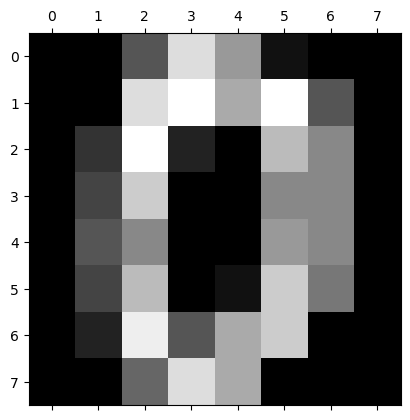

In [ ]:
# Display digit 0.

# Sets the color map of Matplotlib to grayscale.
plt.gray()

# Displays a matrix representation of the first image in the dataset using grayscale colors.
plt.matshow(data.images[0]);

## 3. Make Pandas DataFrame and visualise it using Matplotlib

In [ ]:
# Create a Pandas DataFrame (df) from the "data" key of the loaded Digits dataset.

df = pd.DataFrame(data["data"], columns = data["feature_names"])
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
# Add "target" column in DataFrame to associate each sample with its target class.

df["target"] = data["target"]

In [ ]:
# Calculate and display the count of each unique value in the "target" column.
# Also, display the datatype of "target" column.

df["target"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: target, dtype: int64

In [ ]:
# Display the first 5 rows (four features and target class).

df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [ ]:
# Display the last 5 rows (four features and target class).

df.tail()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9
1796,0.0,0.0,10.0,14.0,8.0,1.0,0.0,0.0,0.0,2.0,...,0.0,0.0,1.0,8.0,12.0,14.0,12.0,1.0,0.0,8


In [ ]:
# Find the top features using Pearson Correlation method.

# Calculate the correlation matrix
correlation_matrix = df.corr(method='pearson')

# Get the correlation values with respect to the target column
target_correlations = correlation_matrix['target'].drop('target')

# Get the top 10 correlations (positive and negative) with respect to the target
top_10_target_corr = target_correlations.nlargest(10)

# Print the top 10 correlations with respect to the target along with their corresponding columns
for column, correlation_value in top_10_target_corr.items():
    print(f"Correlation between '{column}' and 'target': {correlation_value:.4f}")

Correlation between 'pixel_3_3' and 'target': 0.2755
Correlation between 'pixel_4_3' and 'target': 0.2659
Correlation between 'pixel_3_4' and 'target': 0.2342
Correlation between 'pixel_3_5' and 'target': 0.2161
Correlation between 'pixel_1_6' and 'target': 0.2097
Correlation between 'pixel_0_6' and 'target': 0.1973
Correlation between 'pixel_0_5' and 'target': 0.1934
Correlation between 'pixel_4_4' and 'target': 0.1623
Correlation between 'pixel_4_5' and 'target': 0.1619
Correlation between 'pixel_1_2' and 'target': 0.1201


#### We can see the top ten pixel features that have the highest correlation with the class label. These features are the most important features for predicting the class label.

## 4. Create a Training/Testing Dataset and Peek into it


In [ ]:
# Create a new DataFrame X by removing the "target" column from the original DataFrame df.
# X respresents the four features.

X = df.drop("target",axis=1)

In [ ]:
# Assign the "target" column of the DataFrame df to the variable y.
# y represents the target class or label

y = df["target"]

In [ ]:
# Returns the number of elements (size) in the Series y.

y.size

1797

In [ ]:
# Split the data (X and y) into training and testing sets using train_test_split function,
# with 60% for training and 40% for testing. Use 42 as a seed for the random number generator.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [ ]:
# Returns the number of elements (size) in the Series y_train.

y_train.size

1078

In [ ]:
# Returns the number of elements (size) in the Series y_test.

y_test.size

719

In [ ]:
# Print the training set X_train.

print(X_train)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
447         0.0        0.0        0.0       10.0       12.0       15.0   
864         0.0        0.0        2.0       13.0       12.0        0.0   
178         0.0        0.0        6.0       15.0       15.0        3.0   
390         0.0        0.0        0.0        2.0       13.0        1.0   
578         0.0        0.0        0.0        6.0       15.0       12.0   
...         ...        ...        ...        ...        ...        ...   
1130        0.0        1.0       13.0       16.0       16.0       12.0   
1294        0.0        3.0       15.0       16.0       15.0        3.0   
860         0.0        0.0        9.0       16.0       16.0       13.0   
1459        0.0        0.0        1.0       13.0       16.0       10.0   
1126        0.0        0.0        1.0       12.0       11.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
447        16.0       13.0      

In [ ]:
# Print the testing set X_test.

print(X_test)

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
1245        0.0        0.0        0.0        7.0       12.0        0.0   
220         0.0        0.0       11.0       16.0        8.0        0.0   
1518        0.0        0.0        8.0       15.0       12.0        4.0   
438         0.0        0.0        2.0       12.0       12.0       12.0   
1270        0.0        2.0       13.0       16.0       10.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1041        0.0        0.0        8.0       15.0       15.0        2.0   
668         0.0        0.0        8.0       15.0       12.0        1.0   
869         0.0        0.0        4.0       16.0       15.0        7.0   
898         0.0        0.0        1.0       11.0       14.0       15.0   
1169        0.0        0.0       11.0       16.0       12.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_6  pixel_6_7  \
1245        0.0        0.0      

## 5. Scale features between the range [0,1] and Peek into it

In [ ]:
# Create an instance of the MinMaxScaler, a feature scaling technique that scales features to a specified range,
# often between 0 and 1.
scaler = MinMaxScaler()

# Fit the scaler on the training data (X_train) and then transforms it, ensuring that the features are scaled according
# to the specified range.
X_train = scaler.fit_transform(X_train)

# Transform the testing data (X_test) using the same scaling parameters derived from the training data, maintaining
# consistency in the scaling between training and testing data.
X_test = scaler.transform(X_test)

In [ ]:
# Print the scaled training set X_train.

print(X_train)

[[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.125  ... 1.     0.125  0.    ]
 [0.     0.     0.375  ... 0.625  0.0625 0.    ]
 ...
 [0.     0.     0.5625 ... 1.     0.125  0.    ]
 [0.     0.     0.0625 ... 0.     0.     0.    ]
 [0.     0.     0.0625 ... 0.0625 0.     0.    ]]


In [ ]:
# Print the scaled testing set X_test.

print(X_test)

[[0.     0.     0.     ... 0.875  0.3125 0.    ]
 [0.     0.     0.6875 ... 0.0625 0.     0.    ]
 [0.     0.     0.5    ... 0.5    0.     0.    ]
 ...
 [0.     0.     0.25   ... 0.1875 0.     0.    ]
 [0.     0.     0.0625 ... 0.75   0.0625 0.    ]
 [0.     0.     0.6875 ... 1.     1.     0.375 ]]


## 6. Apply Machine Learning Algorithms on Scaled Dataset


### Logistic Regression

In [ ]:
# Apply Logistic Regression on the Digits dataset.

# Initialize a logistic regression classifier with the "multinomial" option for multi-class classification and
# maximum iterations set to 1000.
lr= LogisticRegression(max_iter=1000, multi_class="multinomial")

# Train the logistic regression model on the training data (X_train for features and y_train for labels).
lr.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred =lr.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9735744089012517

Confusion Matrix: 

[[67  0  0  0  0  0  0  0  0  0]
 [ 0 69  2  0  0  0  0  0  1  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 67  0  1  0  0  3  0]
 [ 0  1  0  0 77  0  0  0  0  0]
 [ 0  0  0  0  0 80  1  0  0  2]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  2  0  0  0  1  0  0 62  0]
 [ 0  0  0  1  0  1  0  0  1 74]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       0.96      0.96      0.96        72
           2       0.97      1.00      0.99        66
           3       0.99      0.94      0.96        71
           4       1.00      0.99      0.99        78
           5       0.95      0.96      0.96        83
           6       0.99      0.99      0.99        69
           7       1.00      0.99      0.99        71
           8       0.93      0.95      0.94        65
           9       0.96      0.96      0.96        

### Support Vector Machine

In [ ]:
# Apply Support Vector Machine on the Digits dataset.

# Initialize a Linear Support Vector Classifier (SVC) model for multi-class classification.
svm = LinearSVC()

# Train the LinearSVC model on the training data (X_train for features and y_train for labels).
svm.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred = svm.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9652294853963839

Confusion Matrix: 

[[66  0  0  0  1  0  0  0  0  0]
 [ 0 70  1  0  0  0  0  0  1  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 67  0  1  0  1  2  0]
 [ 0  1  0  0 77  0  0  0  0  0]
 [ 0  1  1  0  0 78  1  1  0  1]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  3  0  0  0  1  0  0 61  0]
 [ 0  0  0  1  0  0  0  1  4 71]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.93      0.97      0.95        72
           2       0.97      1.00      0.99        66
           3       0.99      0.94      0.96        71
           4       0.99      0.99      0.99        78
           5       0.96      0.94      0.95        83
           6       0.99      0.99      0.99        69
           7       0.96      0.99      0.97        71
           8       0.90      0.94      0.92        65
           9       0.97      0.92      0.95        

### Random Forest

In [ ]:
# Apply Random Forest on the Digits dataset.

# Initialize a Random Forest Classifier, an ensemble learning method that combines multiple decision trees to improve
# classification accuracy.
forest = RandomForestClassifier()

# Train the Random Forest Classifier on the training data (X_train for features and y_train for labels).
forest.fit(X_train,y_train)

# Use the trained model to predict labels for the testing data (X_test), and assigns the predictions to the variable pred.
pred = forest.predict(X_test)

# Calculate and print the accuracy score by comparing the predicted labels (pred) with the actual labels (y_test).
print("Accuracy: ", accuracy_score(y_test,pred))
print("====================================================\n")

# Generate and print a confusion matrix that shows the counts of true positive, true negative, false positive,
# and false negative predictions.
print("Confusion Matrix: \n")
print(confusion_matrix(y_test,pred))
print("====================================================\n")

# Print a classification report that includes precision, recall, F1-score, and support for each class, giving a
# detailed assessment of the model's performance.
print("Classification Report: \n")
print(classification_report(y_test, pred))

Accuracy:  0.9707927677329624

Confusion Matrix: 

[[66  0  0  0  1  0  0  0  0  0]
 [ 0 70  2  0  0  0  0  0  0  0]
 [ 0  0 66  0  0  0  0  0  0  0]
 [ 0  0  0 66  0  0  0  1  3  1]
 [ 0  0  0  0 78  0  0  0  0  0]
 [ 0  0  0  0  1 81  1  0  0  0]
 [ 0  0  0  0  0  1 68  0  0  0]
 [ 0  0  0  0  0  0  0 70  0  1]
 [ 0  4  0  0  0  1  0  0 60  0]
 [ 0  0  0  0  0  1  0  2  1 73]]

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       0.95      0.97      0.96        72
           2       0.97      1.00      0.99        66
           3       1.00      0.93      0.96        71
           4       0.97      1.00      0.99        78
           5       0.96      0.98      0.97        83
           6       0.99      0.99      0.99        69
           7       0.96      0.99      0.97        71
           8       0.94      0.92      0.93        65
           9       0.97      0.95      0.96        

###  From the obtainined accuracy results,we can see that –  
    
    The Logistic Regression model exhibits robust accuracy, achieving approximately 97.36%.
    The Linear Support Vector Classifier demonstrates commendable accuracy, approximately 96.52%.
    The Random Forest model performs well with an accuracy of about 97.08%
    Overall, the models exhibit strong performance on the Digits dataset. While Logistic Regression model boasts highest accuracy, the differences between the models' accuracies are relatively minor.

## 7. Run Predictions on Random Forest Model


In [ ]:
# Input image number.

image_number = int(input("Enter image number from 0 to 1797: "))

Enter image number from 0 to 1797: 4


In [ ]:
# Get a feature vector for user input image number.

image_features = data.images[image_number]
print(image_features)

[[ 0.  0.  0.  1. 11.  0.  0.  0.]
 [ 0.  0.  0.  7.  8.  0.  0.  0.]
 [ 0.  0.  1. 13.  6.  2.  2.  0.]
 [ 0.  0.  7. 15.  0.  9.  8.  0.]
 [ 0.  5. 16. 10.  0. 16.  6.  0.]
 [ 0.  4. 15. 16. 13. 16.  1.  0.]
 [ 0.  0.  0.  3. 15. 10.  0.  0.]
 [ 0.  0.  0.  2. 16.  4.  0.  0.]]


<Figure size 640x480 with 0 Axes>

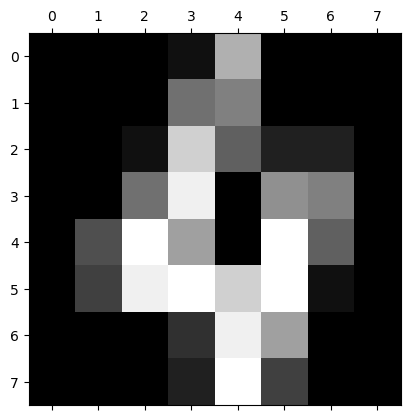

In [ ]:
# Display digit.

# Sets the color map of Matplotlib to grayscale.
plt.gray()

# Displays a matrix representation of the first image in the dataset using grayscale colors.
plt.matshow(data.images[image_number]);

In [ ]:
# Flatten the image and show it.

flattened_image = image_features.flatten()
print(flattened_image)

[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]


In [ ]:
# Convert the flattened image to numpy array

import numpy as np

user_input = np.array([flattened_image])
print(user_input)

[[ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
   1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
   0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
   0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]]


In [ ]:
# Use the trained model to predict the digit type.
predicted_class = forest.predict(user_input)

# Map the predicted class index to the corresponding class name.
predicted_class_name = data.target_names[predicted_class][0]

print(f"The predicted digit is: {predicted_class_name}")

The predicted digit is: 4


In [ ]:
# The actual Digit class

actual_class_name = data.target[image_number]
print(f"The actual digit is: {actual_class_name}")

The actual digit is: 4


# Exercises

    1.) In section 5 of the notebook, feature scaling is performed. Comment out this section and rerun the notebook.
    Check if feature scaling makes any difference on the performance of the three machine learning algorithms (linear
    regression, support vector machines, and random forest) used in the notebook. Note down the obtained results, including the accuracy, precision, recall, & F1-score of the machine learning algorithms in the provided excel sheet.
    
    2.) In notebook, the dataset is divided into 60% training data and 40% testing data. Rerun the notebook for a different split of the dataset, such as 70% training data and 30% testing data.  You should also scale the features. Note down the results, including the accuracy, precision, recall, & F1-score of the machine learning algorithms in the provided excel sheet.
    